In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
hist_mark = gpd.read_file('../data/Historical Markers.geojson')
print(hist_mark.crs)
hist_mark.head()

epsg:4326


,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,None,POINT (-86.78157 36.15930)
1,78,Belle Meade Boulevard at Warner Park entrance,36.083058,Percy Warner Park 2058.1 Acres,Percy Warner (1861-1927) was a pioneer in elec...,-86.867129,1982,None,POINT (-86.86713 36.08306)
2,94,Union Street and Capitol Boulevard,36.163758,Votes for Women,"On August 18, 1920, Tennessee became the 36th ...",-86.78287,1995,None,POINT (-86.78287 36.16376)
3,215,Lock 2 Road,36.244216,Lock 2 Park,"In 1888, the U.S. Army Corps of Engineers soug...",-86.70192,2020,None,POINT (-86.70192 36.24422)
4,127,Smith Springs Road and Old Murfreesboro Road,36.096776,Una Community,The Una community developed around the crossro...,-86.654516,2008,None,POINT (-86.65452 36.09678)


In [19]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


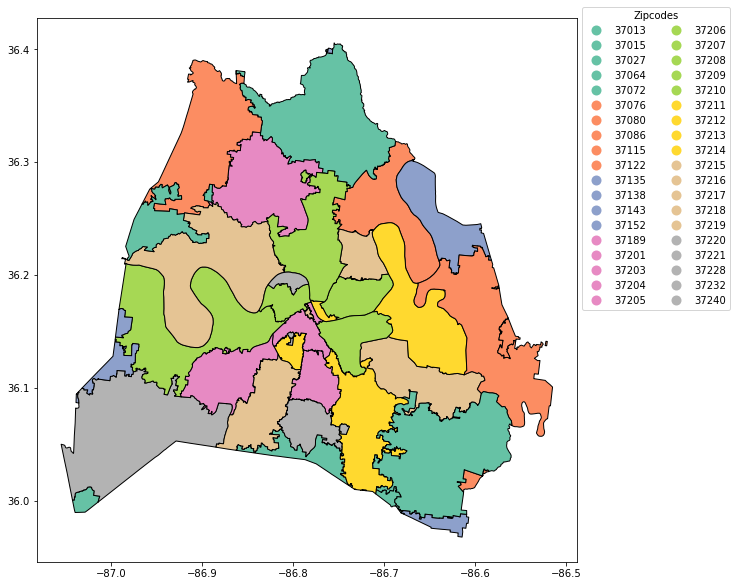

In [20]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

In [3]:
type(hist_mark)

geopandas.geodataframe.GeoDataFrame

In [5]:
print(hist_mark.loc[0,'geometry'])

POINT (-86.781572 36.159303)


In [23]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [24]:
hist_geo = gpd.GeoDataFrame(hist_mark, 
                           crs = zipcodes.crs, 
                           geometry = hist_mark['geometry'])

In [25]:
type(hist_geo)

geopandas.geodataframe.GeoDataFrame

In [26]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]

In [27]:
mark_by_zip = gpd.sjoin(hist_geo, zipcodes, op = 'within')

In [28]:
mark_by_zip.head()

,number,location,latitude,marker_name,marker_text,longitude,year_erected,civil_war_site,geometry,index_right,zip,po_name
0,120,"Hume-Fogg High School, 700 Broadway",36.159303,Randall Jarrell 1914-1965,"Distinguished poet, critic, novelist, and teac...",-86.781572,2005,None,POINT (-86.78157 36.15930),35,37203,NASHVILLE
10,14,801 Broadway,36.158648,Nashville Centennial 1780-1880,"On April 24, 1880, Nashville began a month-lon...",-86.782508,1969,None,POINT (-86.78251 36.15865),35,37203,NASHVILLE
11,140,34 Music Square East,36.149432,Bradley Studios,"In 1955, brothers Owen and Harold Bradley buil...",-86.792024,2011,None,POINT (-86.79202 36.14943),35,37203,NASHVILLE
15,12,"Hume-Fogg High School, 700 Broadway",36.159303,Nashville’s First Public School,"Nashville’s first public school, Hume School, ...",-86.781572,1969,None,POINT (-86.78157 36.15930),35,37203,NASHVILLE
17,87,Eighth Avenue North and Charlotte Pike,36.164267,Nashville Sit-ins,Formerly located at this site was First Baptis...,-86.785598,1992,None,POINT (-86.78560 36.16427),35,37203,NASHVILLE


In [30]:
mark_by_zip['zip'].value_counts()

37203    50
37212    18
37208    18
37209    14
37210    13
37205    12
37206    12
37201    11
37013     8
37221     8
37204     8
37215     8
37219     7
37217     7
37214     6
37211     6
37218     5
37207     5
37220     5
37115     4
37138     4
37076     3
37228     3
37213     2
37072     2
37216     2
37189     1
37080     1
37027     1
Name: zip, dtype: int64

In [36]:
mark_in_37211 = mark_by_zip.loc[mark_by_zip['zip'] == '37211']
mark_in_37211.shape

(6, 12)

In [34]:
polygon37211 = zipcodes.loc[zipcodes['zip'] == '37211']
polygon37211.shape

(1, 3)

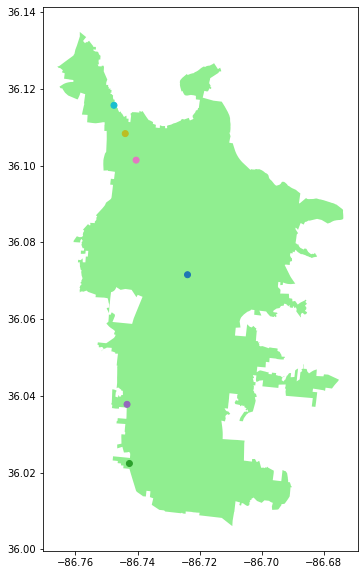

In [38]:
ax = polygon37211.plot(figsize = (8, 10), color = 'lightgreen')
mark_in_37211.plot( ax = ax, column = 'marker_name');
plt.show();

In [39]:
polygon37211.geometry.centroid

/var/folders/s_/vzlfmfg172vdq5rdfwy02xlc0000gn/T/ipykernel_25984/2670406774.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37211.geometry.centroid


49    POINT (-86.72308 36.06711)
dtype: geometry

In [40]:
center = polygon37211.geometry.centroid[49]
print(center)

POINT (-86.72307880301152 36.06711142916258)


/var/folders/s_/vzlfmfg172vdq5rdfwy02xlc0000gn/T/ipykernel_25984/1880818173.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37211.geometry.centroid[49]


In [41]:
area_center = [center.y, center.x]
print(area_center)

[36.06711142916258, -86.72307880301152]


In [42]:
map_37211 = folium.Map(location =  area_center, zoom_start = 12)
map_37211

In [43]:
i = 0
for row_index, row_values in mark_in_37211.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 85
values are:
 
number                                                           55
location          Nolensville Road, between Joyner Avenue and Wh...
latitude                                                  36.115696
marker_name                                                Woodbine
marker_text       An early settler of this area was James Menees...
longitude                                                -86.747595
year_erected                                                   1975
civil_war_site                                                 None
geometry                               POINT (-86.747595 36.115696)
index_right                                                      49
zip                                                           37211
po_name                                                   NASHVILLE
Name: 85, dtype: object
------------------------- 
index is 98
values are:
 
number                                                           82
location     

In [49]:

map_37211 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37211).add_to(map_37211)

for row_index, row_values in mark_in_37211.iterrows():
    loc = [row_values['latitude'], row_values['longitude']]
    pop = str(row_values['marker_name'])
    icon=folium.Icon(color="red",icon="fa-camera", prefix='fa')

    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37211)
map_37211.save('../maps/map37211.html')


map_37211